Based on https://www.kaggle.com/tolgahancepel Jupyter Notebook


## 1. Overview

# 🏡 Boston Housing Price Analysis: Understanding Social Structure Through Data
This project is based on the classic Boston Housing Dataset available on Kaggle.
The goal is not only to explore the statistical relationships that affect housing prices,
but also to connect them to broader socioeconomic contexts — such as housing accessibility for low-income groups,
education resource distribution, and environmental quality across neighborhoods.

Dataset source (original notebook): https://www.kaggle.com/tolgahancepel

We aim to explore a variety of social issues by linking data analysis with structural interpretation.

Through exploratory data analysis and regression modeling, we will:
Analyze multiple factors that influence housing prices (e.g., number of rooms, crime rate, education level);

Examine the underlying social structure behind these variables, such as unequal access to education or wealth disparities across communities;

Use visualizations to support interpretation and enhance understanding of both quantitative results and their broader urban planning implications.

Dataset description：
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000

- PTRATIO: pupil-teacher ratio by town
- B:1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

## 2. Importing Libraries and Reading the Dataset

2.1 Import necessary python libraries


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#from sklearn.datasets import fetch_openml

##boston_dataset = fetch_openml(name="boston", version=1, as_frame=True)
##dataset = boston_dataset.frame

# save as csv file
##dataset.to_csv("boston_data.csv", index=False)

# Re-read the data
##dataset = pd.read_csv("boston_data.csv")


file_path = '/content/drive/MyDrive/boston_data.csv'
dataset = pd.read_csv(file_path)

2.2 Display the dataset, using appropriate methods.

In [16]:
dataset.head(20)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


## 3. Data Analysis

### Data Preprocessing

3.1 Check if there is any missing values here. Fix the problem if it exists.Ensuring data completeness is critical for reliable analysis and modeling

In [17]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


3.2 Split the dataset into Training set and Test set (Test_size = 30%)

In [18]:
#X = dataset.drop(columns=["MEDV"]).values
#y = dataset["MEDV"].values.reshape(-1, 1)

# Split the dataset: 70% for training, 30% for testing

In [22]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [25]:
# Output shape
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


### Visualizing Data

3.3 Use appropriate visualization methods to display the relationship between different variables. Explain it in summary.

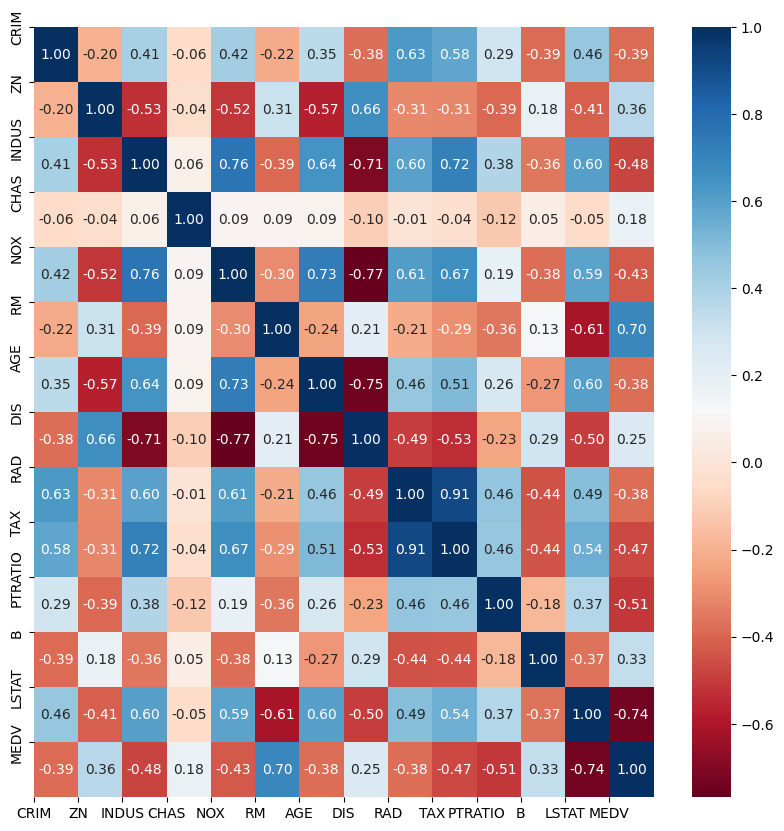

In [26]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

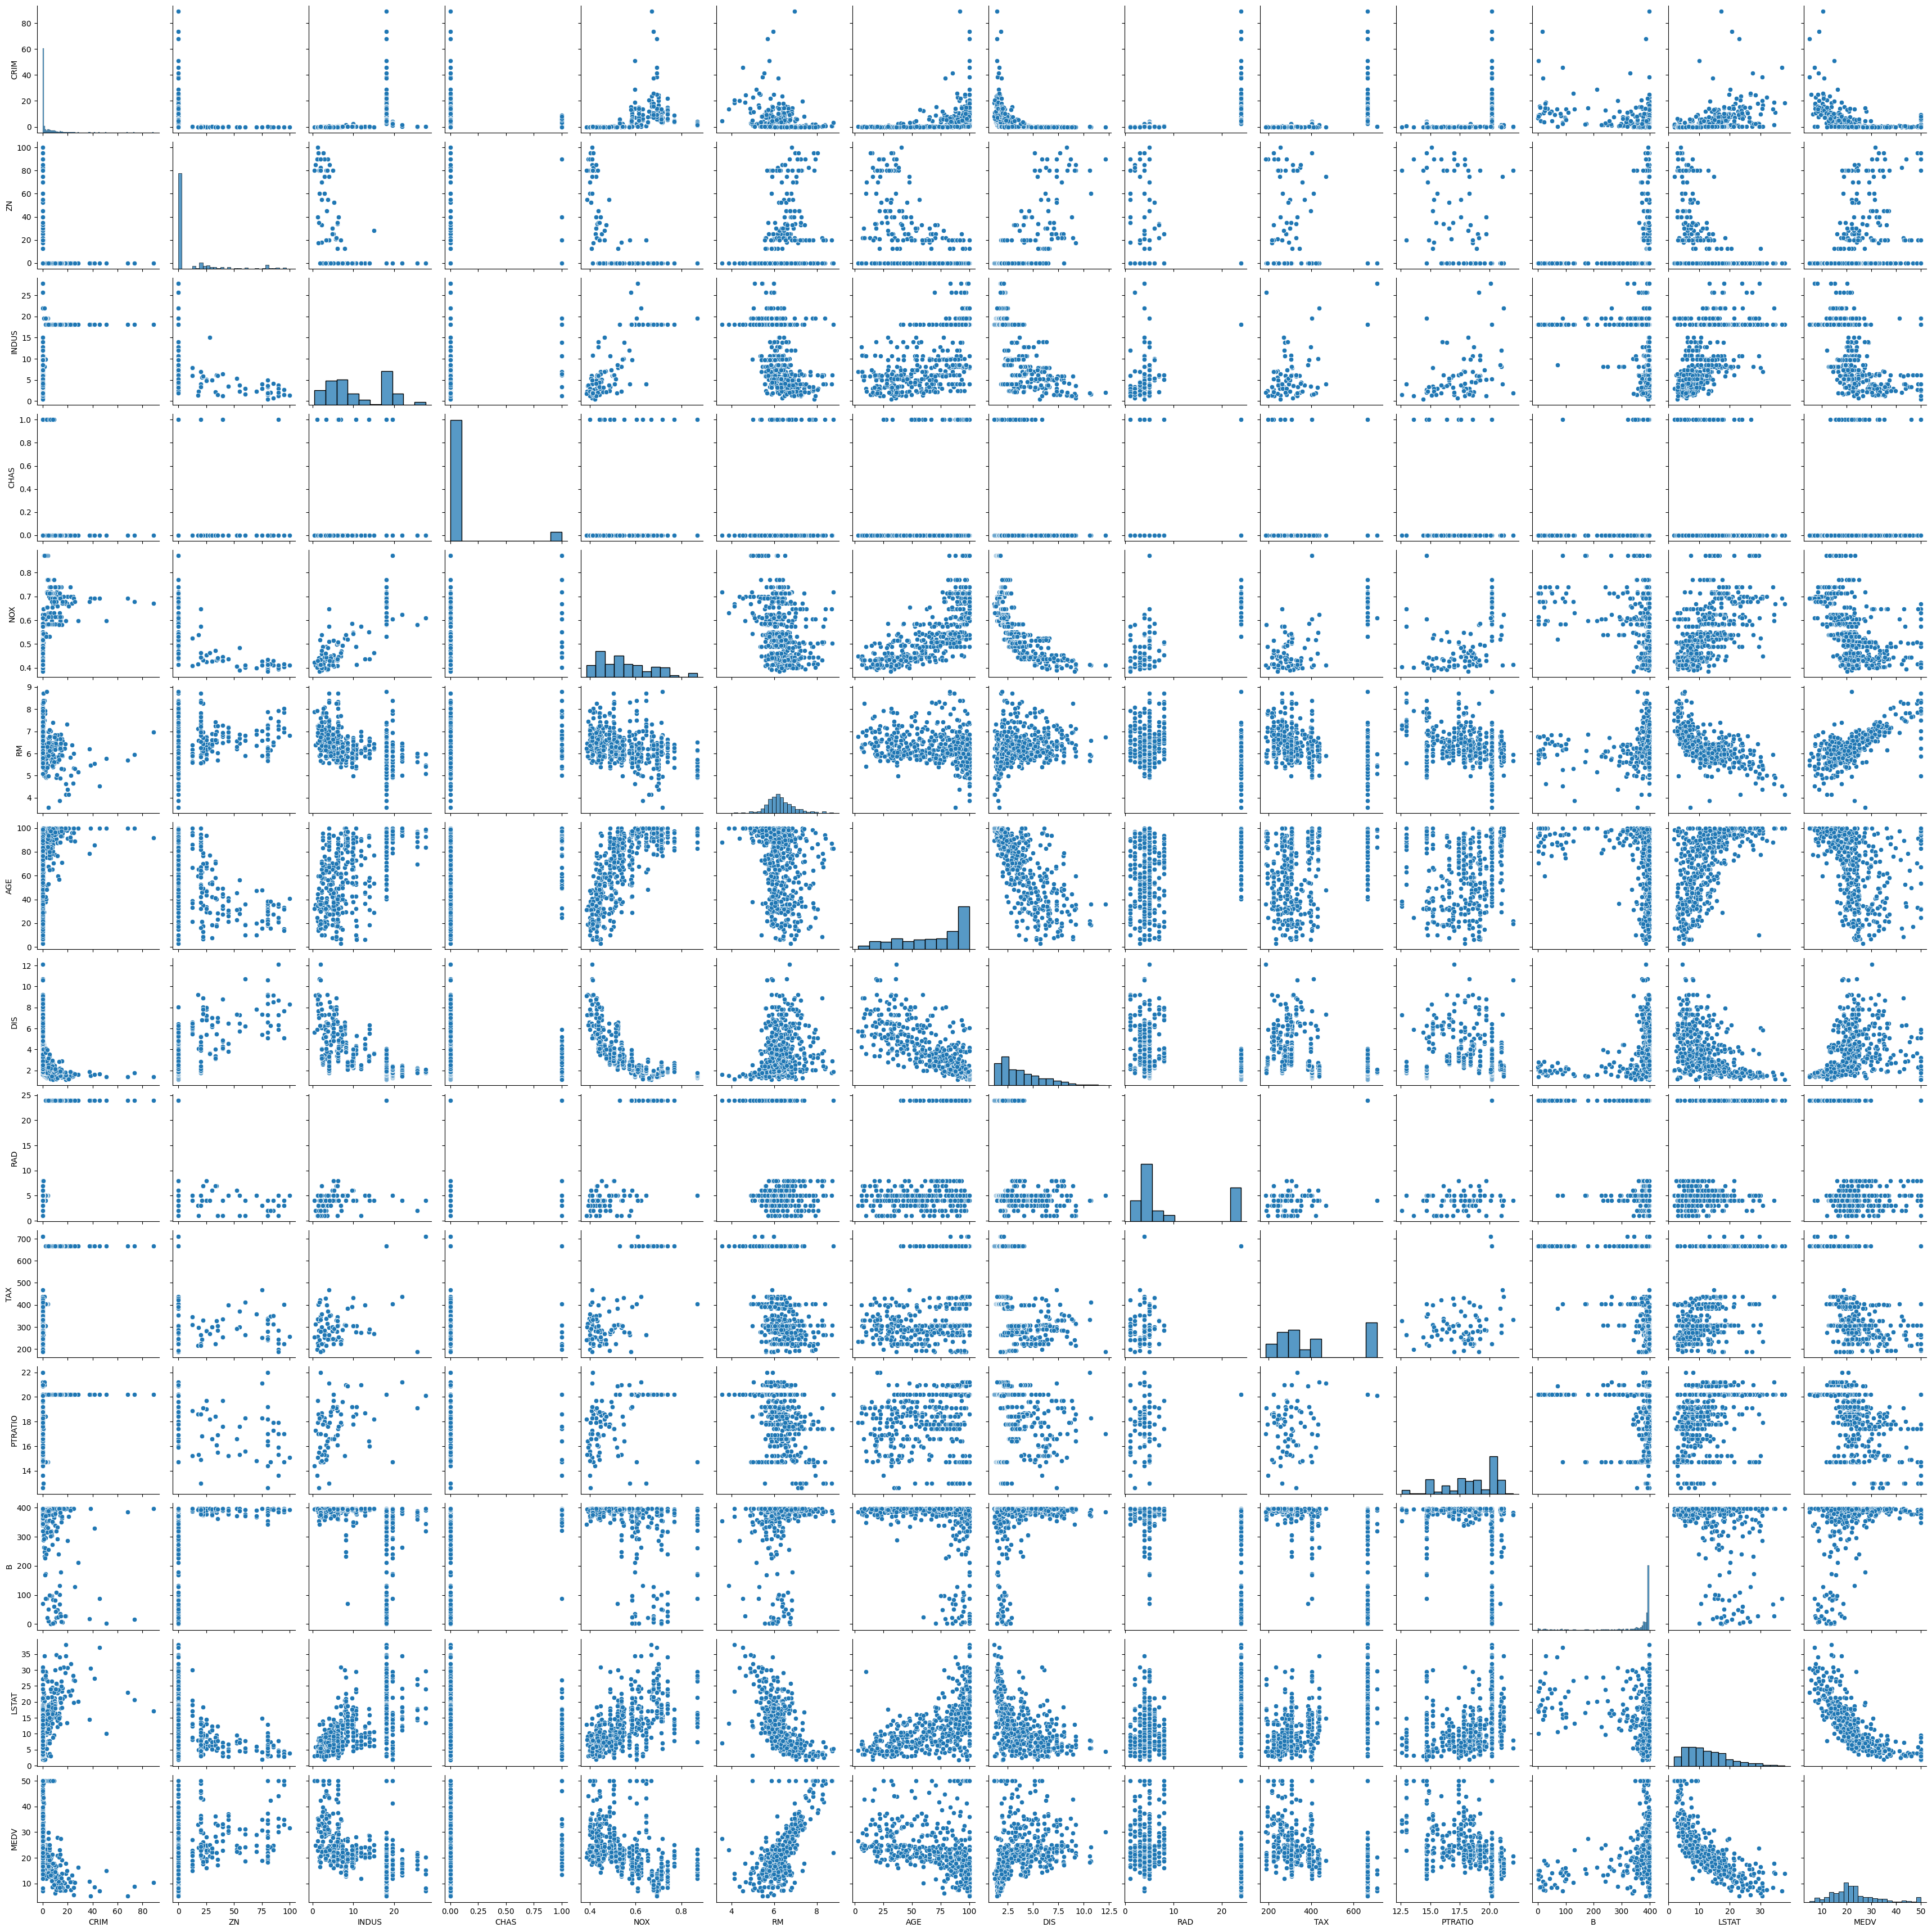

In [27]:
sns.pairplot(dataset)
plt.show()

- `PTRATIO` (Pupil–Teacher Ratio): Indicates the level of access to education resources, and can be used as a proxy for educational equity or disparity across neighborhoods.
- `CRIM` (Crime Rate): Reflects perceived neighborhood safety; however, it may also be influenced by policing practices and racialized enforcement, making its interpretation complex.
- `NOX` (Nitric Oxide Concentration): Associated with environmental pollution, often disproportionately affecting low-income or marginalized communities — a key issue in environmental justice.
- `AGE` (Proportion of Older Housing): Distinguishes between aging neighborhoods and newer developments, and may reflect patterns of disinvestment or gentrification tied to social stratification.

## 4. Regression Models

Use 4 Machine Learning models to practice regression: OLS, Support Vector Machine, Random Forest and XGboost.

Make comparison between these models and evaluate them.

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

### OLS Regression

In [29]:
# Fitting the OLS Model to the dataset
from sklearn.linear_model import LinearRegression
regressor_ols = LinearRegression()
regressor_ols.fit(X_scaled, y_scaled)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score
cv_ols = cross_val_score(estimator = regressor_ols, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_ols_train = sc_y.inverse_transform(regressor_ols.predict(sc_X.transform(X_train)).reshape(-1, 1))
r2_score_ols_train = r2_score(y_train, y_pred_ols_train)

# Predicting R2 Score the Test set results
y_pred_ols_test = sc_y.inverse_transform(regressor_ols.predict(sc_X.transform(X_test)).reshape(-1, 1))
r2_score_ols_test = r2_score(y_test, y_pred_ols_test)

# Predicting RMSE the Test set results
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols_test))
print('CV: ', cv_ols.mean())
print('R2_score (train): ', r2_score_ols_train)
print('R2_score (test): ', r2_score_ols_test)
print("RMSE: ", rmse_ols)


CV:  0.6984854476156039
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710357
RMSE:  4.647279745724207


### "Evaluate the model's fitting performance across different housing price segments."



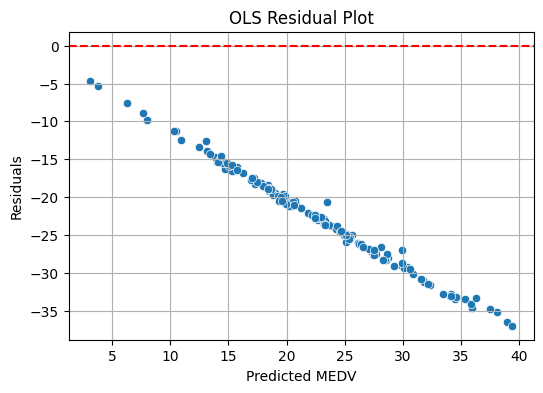

In [31]:
# Residual Plot (for OLS model)

residuals = sc_y.transform(y_test) - y_pred_ols_test
residuals = residuals.ravel()
predictions = y_pred_ols_test.ravel()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("OLS Residual Plot")
plt.grid(True)
plt.show()

### Support Vector Regression

In [32]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [33]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)).reshape(-1,1))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.782600693247584
R2_score (train):  0.8742715669147498
R2_score (test):  0.8044070157723574
RMSE:  3.8388977809328355


### Random Forest Regression

In [34]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [35]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8182118617652808
R2_score (train):  0.9768407108850092
R2_score (test):  0.8637486208767902
RMSE:  3.204057971213175


### XGBoost

In [37]:
# Fitting the XGBoost Regression to the dataset
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor(n_estimators = 500, random_state = 0)
regressor_xgb.fit(X_train, y_train.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [38]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_xgb = cross_val_score(estimator = regressor_xgb, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_xgb_train = regressor_xgb.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_xgb_train)

# Predicting R2 Score the Test set results
y_pred_xgb_test = regressor_xgb.predict(X_test)
r2_score_xgb_test = r2_score(y_test, y_pred_xgb_test)

# Predicting RMSE the Test set results
rmse_xgb = (np.sqrt(mean_squared_error(y_test, y_pred_xgb_test)))
print('CV: ', cv_xgb.mean())
print('R2_score (train): ', r2_score_xgb_train)
print('R2_score (test): ', r2_score_xgb_test)
print("RMSE: ", rmse_xgb)

CV:  0.809619279748303
R2_score (train):  0.9999999739012218
R2_score (test):  0.877117216608567
RMSE:  3.0428141817944367


## 5. Measuring the Error

Visualize the error and explain it.

In [39]:
models = [
          ('OLS Regression', rmse_ols, r2_score_ols_train, r2_score_ols_test, cv_ols.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('XGBoost Regression', rmse_xgb, r2_score_xgb_train, r2_score_xgb_test, cv_xgb.mean())]

In [40]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,OLS Regression,4.647280,0.743579,0.713359,0.698485
1,Support Vector Regression,3.838898,0.874272,0.804407,0.782601
2,Random Forest Regression,3.204058,0.976841,0.863749,0.818212
3,XGBoost Regression,3.042814,1.000000,0.877117,0.809619


### Visualizing Model Performance

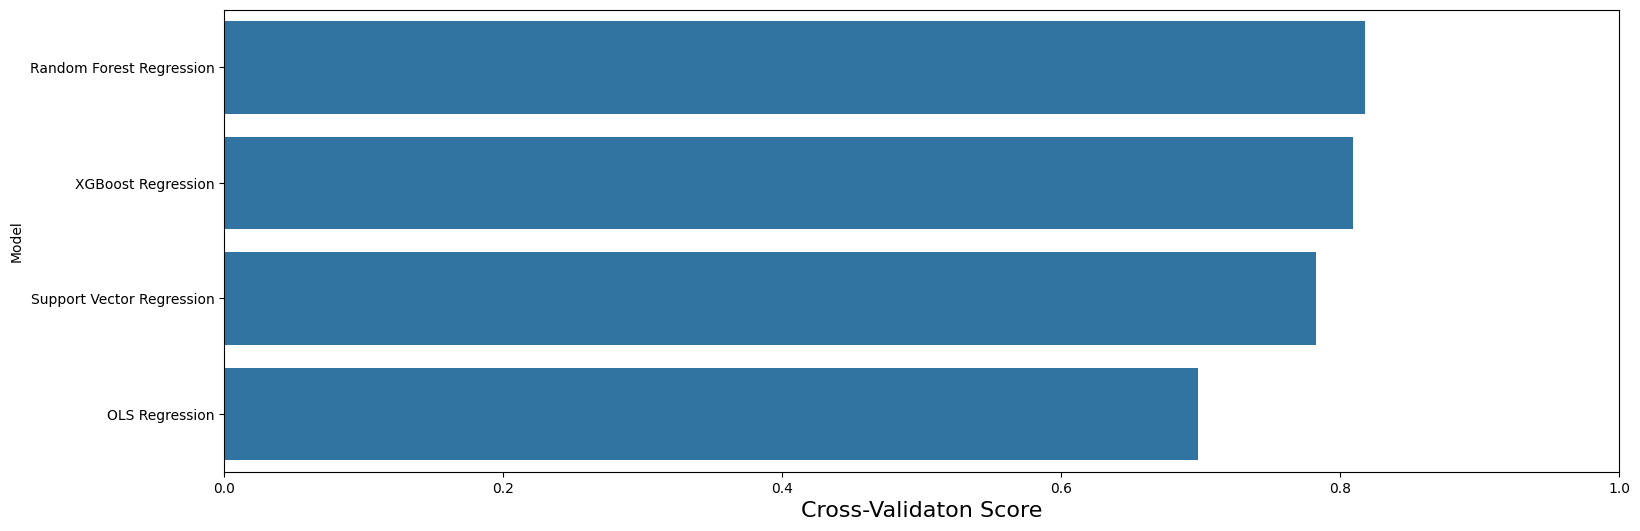

In [41]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

<ipython-input-42-749ffc9863bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
<ipython-input-42-749ffc9863bd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])


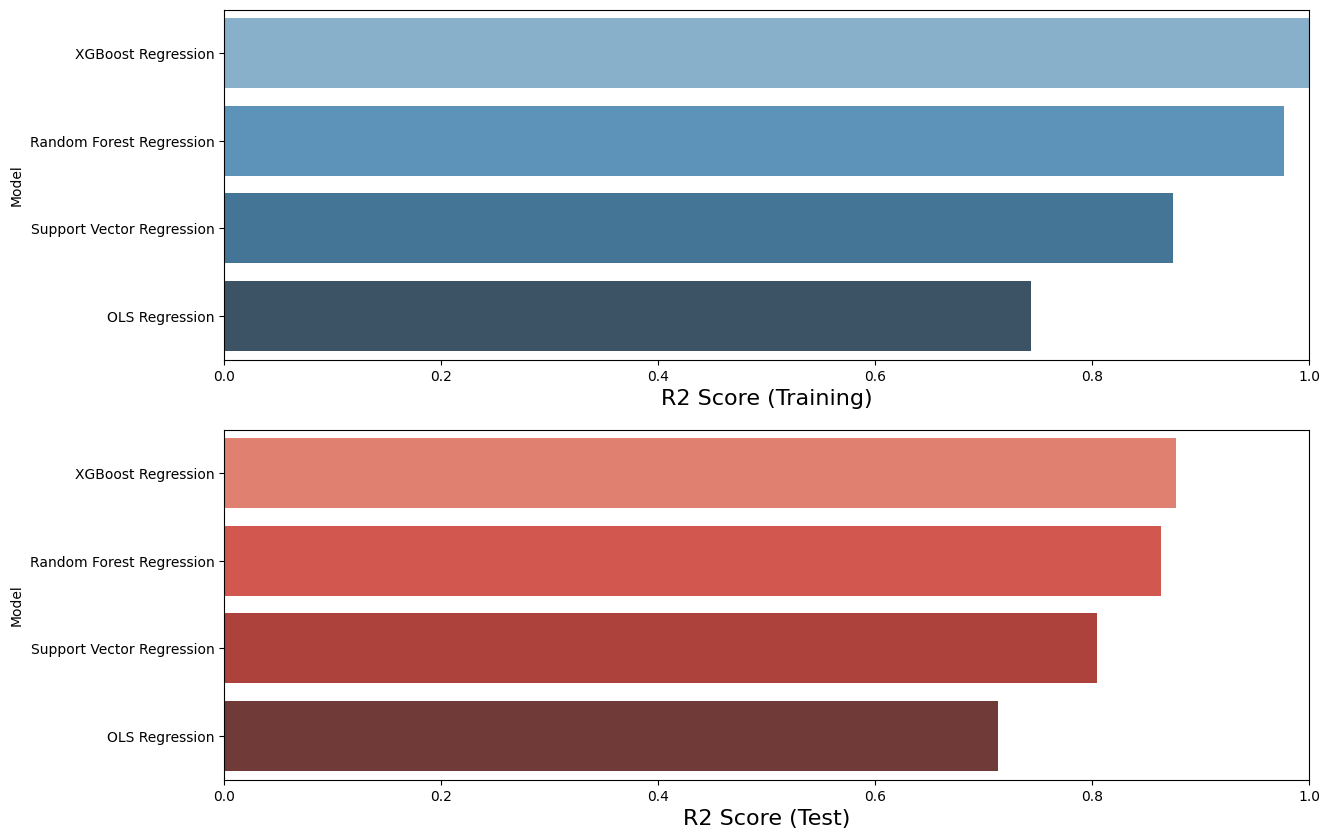

In [42]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

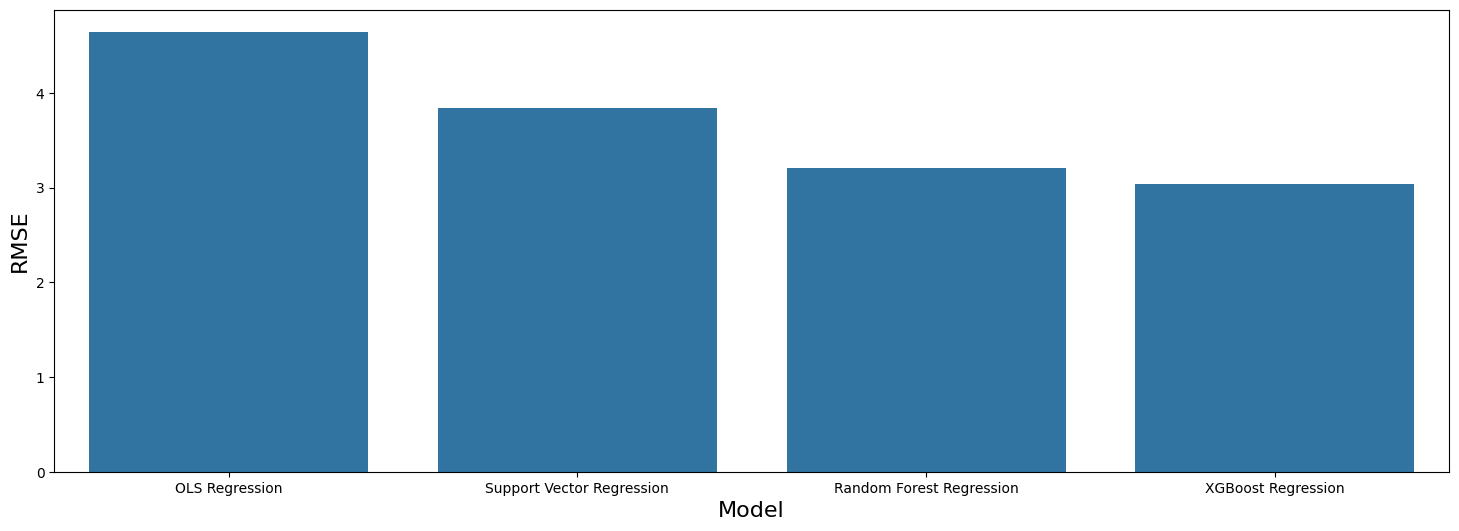

In [43]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

Since records within crime data(column named CRIM) may contain records of excessive police enforcement, it's controversial whether researchers should use such data in regression model. Will it cause biased result or Is the problem serious enough? Please give your opinion based on this dataset. You can draw conclusion through multi-sourced data analysis or refer to any relevant report and blog. Please note that we need analysing process.


### 🔍 Interpreting CRIM Through Model Behavior

To examine whether the use of `CRIM` causes biased results, we evaluated its statistical relationship with house prices and its role in regression models.

- `CRIM` showed a moderately strong negative correlation with `MEDV`, which aligns with conventional expectations that crime perception affects housing demand.
- However, residual plots from the OLS model reveal no clear pattern of systematic over- or under-prediction in high-CRIM regions. This suggests that while `CRIM` influences price, its inclusion did not significantly distort model performance within this dataset.
- Nonetheless, the variable may reflect deeper systemic issues — such as over-policing or racial profiling — that are not explicitly represented in the dataset. This raises ethical concerns about reinforcing inequality through modeling.

Given the complexity, we recommend using `CRIM` cautiously, and ideally in conjunction with broader indicators of neighborhood quality and social well-being.


### 📌 Extended Insights: Model Interpretation, Social Structure, and Data Ethics

- House price predictions reflect not only market dynamics, but also deeply rooted social structures and inequalities.
- Neighborhoods with high crime rates (`CRIM`), fewer rooms (`RM`), and lower educational quality (`PTRATIO`) consistently exhibit lower housing prices. These patterns may reveal historical disinvestment, zoning inequities, or structural neglect in urban development.
- **Data science must go beyond technical accuracy** — it should be a tool for **evidence-based policymaking**. Predictive models can help identify marginalized areas in need of public investment, affordable housing, or education reforms.
- Future research should integrate broader variables such as racial composition, transportation access, job density, healthcare coverage, and community engagement to better represent the multidimensional nature of housing justice.
- Lastly, it is essential to consider **data ethics**: variables like `CRIM` may reflect biases in policing or reporting, not actual neighborhood safety. Therefore, interpretation of models must be accompanied by **critical awareness of data sources, historical context, and social responsibility**.

> A responsible regression model is not just about minimizing error — it's about maximizing fairness, representation, and long-term societal insight.


### 🔧 Further Suggestions for Enhancing Analysis

While the current notebook successfully explores key predictors of housing prices and connects them to broader social issues, several enhancements could further strengthen the analysis:

#### 📊 Variable-Level Social Interpretation

- **`AGE` (Proportion of older housing):** Can be linked to urban renewal vs. decay. Older housing stock may cluster in disinvested neighborhoods, representing a form of structural neglect.
- **`NOX` (Air pollution):** May indicate environmental injustice. Lower-income communities are often located closer to highways or industrial zones and disproportionately bear pollution burden.
- **`ZN` (Zoning for large residential lots):** Could reflect exclusionary zoning policies, which affect housing availability and social segregation.

#### 📈 Visual Improvements

- Consider adding a **bar chart comparing model RMSE or R² scores** (OLS vs SVR vs Random Forest vs XGBoost) to clearly visualize trade-offs between interpretability and accuracy.
- A **heatmap of feature importance** from Random Forest/XGBoost models could provide intuitive insight into which variables drive predictions most strongly.

#### 📚 External Context

- Integrate insights or data from external sources (e.g. housing equity reports, urban inequality blogs) to support your ethical reflection on `CRIM` and urban planning.
- Cite sources such as *FiveThirtyEight's article on crime data bias* or academic discussions on *environmental justice in housing* to support interpretive claims.

---

These improvements are not essential for the current analysis but could elevate the work to publication or policy-brief level, offering a more comprehensive view of housing data in relation to social inequality.